## 1. Mount Directory and Check for Files

In [90]:
from google.colab import drive
drive.mount('/content/drive')

import os

path = '/content/drive/MyDrive/Kaggle/chest_xray'

# List contents of directory
if os.path.exists(path):
    print(f"Contents of '{path}':")
    for item in os.listdir(path):
        print(item)
else:
    print(f"Directory not found: '{path}'")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contents of '/content/drive/MyDrive/Kaggle/chest_xray':
__MACOSX
val
test
train
chest_xray


## 1.1 Display Random Image from test folder

Displaying random normal image: /content/drive/MyDrive/Kaggle/chest_xray/test/NORMAL/NORMAL2-IM-0327-0001.jpeg


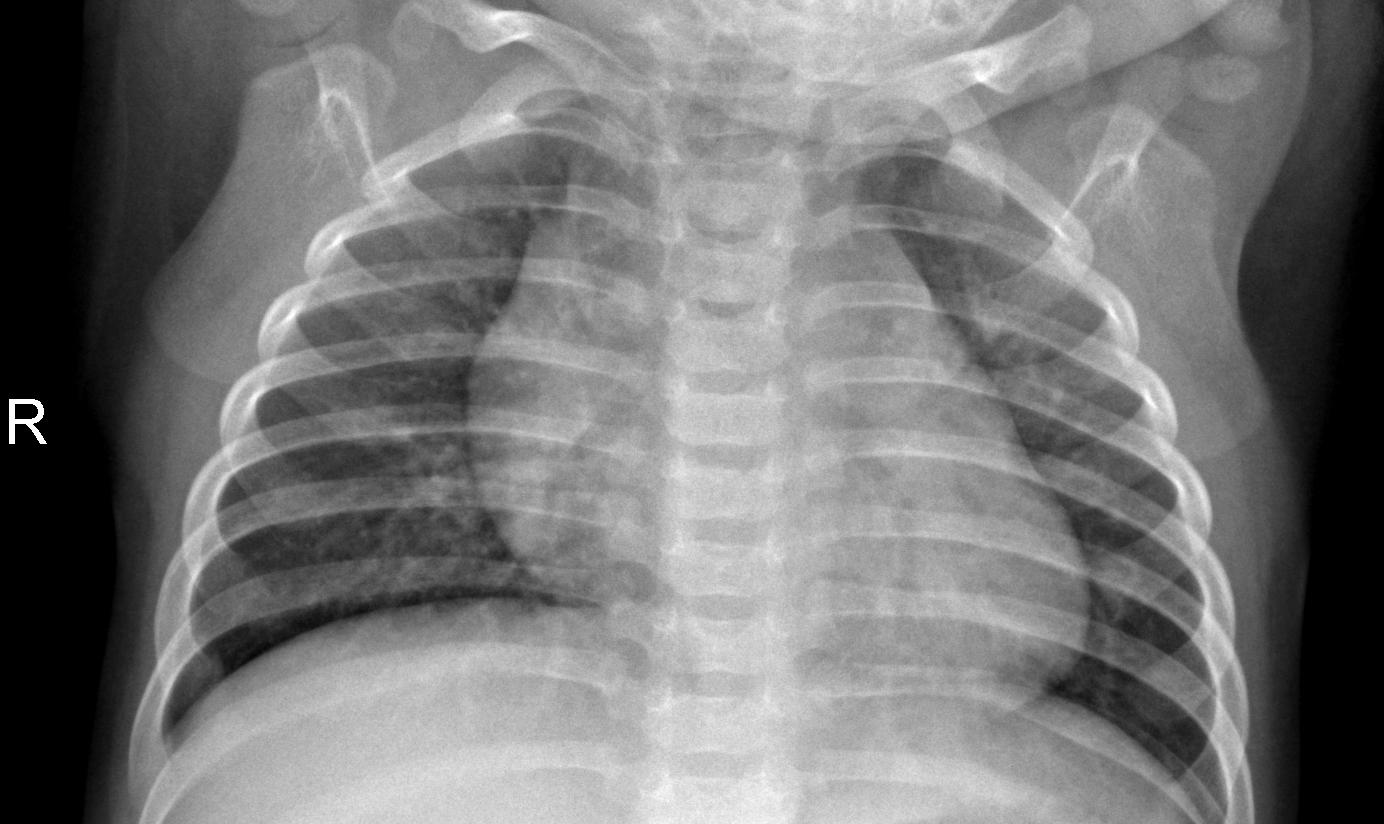

In [91]:
import random
from IPython.display import display, Image
import os

path_test = os.path.join(path, 'test')
path_test_NORMAL = os.path.join(path_test, 'NORMAL')

# Get list of image files from the Normal subdirectory
imgs_NORMAL = [os.path.join(path_test_NORMAL, f) for f in os.listdir(path_test_NORMAL) if f.endswith('.jpeg')]

if imgs_NORMAL:
    random_image_path = random.choice(imgs_NORMAL)
    print(f"Displaying random normal image: {random_image_path}")
    display(Image(filename=random_image_path))
else:
    print("No normal image files found in the test directory.")

## 1.2 Display amount of images in each folder

In [92]:
import os

test_path = os.path.join(path, 'test')
test_normal_path = os.path.join(test_path, 'NORMAL')
test_pneumonia_path = os.path.join(test_path, 'PNEUMONIA')

if os.path.exists(test_normal_path):
    normal_count = len([f for f in os.listdir(test_normal_path) if f.endswith('.jpeg')])
    print(f"Number of images in NORMAL folder: {normal_count}")
else:
    print(f"NORMAL folder not found: {test_normal_path}")

if os.path.exists(test_pneumonia_path):
    pneumonia_count = len([f for f in os.listdir(test_pneumonia_path) if f.endswith('.jpeg')])
    print(f"Number of images in PNEUMONIA folder: {pneumonia_count}")
else:
    print(f"PNEUMONIA folder not found: {test_pneumonia_path}")

Number of images in NORMAL folder: 234
Number of images in PNEUMONIA folder: 390


## 1.3 Define image parameters

### Subtask:
Define the image size and batch size for the CNN model.


**Reasoning**:
Define the image size and batch size variables as specified in the instructions.



In [93]:
image_size = (150, 150)
batch_size = 32

print(f"Image size: {image_size}")
print(f"Batch size: {batch_size}")

Image size: (150, 150)
Batch size: 32


## 1.4 Create data generators

### Subtask:
Use Keras `ImageDataGenerator` to load, preprocess, and augment the images from the training, validation, and test directories.


**Reasoning**:
Import the necessary class and create ImageDataGenerator instances for training, validation, and test datasets with appropriate parameters as per the instructions.



In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create ImageDataGenerator for validation and test data with only rescaling
val_test_datagen = ImageDataGenerator(rescale=1./255)

## 1.5 Prepare data sets

### Subtask:
Create the training, validation, and test data sets using the data generators.


**Reasoning**:
Define the paths to the training, validation, and test directories and create the data generators using the defined paths and parameters.



In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

train_dir = os.path.join(path, 'train')
val_dir = os.path.join(path, 'val')
test_dir = os.path.join(path, 'test')

# train_datagen() modifications:
# (generators with augmentation for train only.)
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Generators
# val_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for val/test
# test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle = False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle = False
)

# # Compute class weights for imbalance
# train_labels = train_generator.classes
# class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
# class_weight_dict = dict(enumerate(class_weights))
# print("Class weights:", class_weight_dict)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## 1.6 Visualize sample images

### Subtask:
Display a few sample images from the training set to verify the data loading and preprocessing.


**Reasoning**:
Retrieve a batch of images and labels from the train_generator and display a few samples to verify the data loading and preprocessing.



**Reasoning**:
The `next()` method is deprecated for `DirectoryIterator`. Use `__next__()` instead to retrieve a batch of images and labels from the `train_generator` and display a few samples.



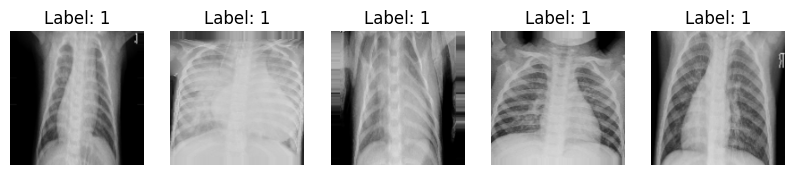

In [96]:
import matplotlib.pyplot as plt

# Retrieve one batch of images and labels
images, labels = train_generator.__next__()

# Display a few images
num_images_to_display = 5

plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis('off')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The image size was set to (150, 150) and the batch size to 32 for the CNN model.
*   `ImageDataGenerator` instances were created: `train_datagen` with augmentation (rescaling, shear, zoom, horizontal flip) and `val_test_datagen` with only rescaling.
*   Data generators (`train_generator`, `val_generator`, `test_generator`) were created from the specified directories, successfully identifying 5216 images in the training set, 16 in the validation set, and 624 in the test set, all belonging to 2 classes.
*   Sample images from the training set were successfully displayed, verifying the data loading and preprocessing steps.

### Insights or Next Steps

*   The data is prepared and ready to be used for training a simple CNN model for image classification.
*   The class distribution across the training, validation, and test sets should be checked to ensure it is balanced, especially given the small size of the validation set (16 images).


# Convolutional Neural Network
Model a simple CNN for image classification based on existing code, compile, train, evaluate and visualize the results.

## 2.0 Define CNN model

### Subtask:
Define the architecture of a simple Convolutional Neural Network using Keras Sequential API.


**Reasoning**:
Import necessary Keras modules and define the CNN model architecture as instructed.



In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

#image_size[0] = 150 (x)
#image_size[1] = 150 (y)

model = Sequential([
    # Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    # Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    # Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    # Dense Layer
    Dense(256, activation='relu'),
    Dropout(0.5),  # Helps with overfitting
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 2.1 Compile the model

### Subtask:
Compile the CNN model with an appropriate optimizer, loss function, and metrics.


**Reasoning**:
Import the Adam optimizer and compile the model as specified in the instructions.



In [98]:
from tensorflow.keras.optimizers import Adam

# Adam optimizer makes use of gradient descent and backpropagation

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,564,609 (36.49 MB)

 Trainable params: 9,564,161 (36.48 MB)

 Non-trainable params: 448 (1.75 KB)

## 2.3 Train the model

### Subtask:
Train the CNN model using the prepared training and validation data generators.


**Reasoning**:
Train the compiled CNN model using the prepared training and validation data generators for a specified number of epochs.



In [99]:
history = model.fit(
    train_generator,
    steps_per_epoch= train_generator.samples // batch_size, # 163
    epochs=10,
    validation_data=val_generator,
    validation_steps=None
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 622s 4s/step - accuracy: 0.8353 - loss: 0.7402 - val_accuracy: 0.5000 - val_loss: 7.1521
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 613s 4s/step - accuracy: 0.9262 - loss: 0.1847 - val_accuracy: 0.5000 - val_loss: 8.6238
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 609s 4s/step - accuracy: 0.9310 - loss: 0.1736 - val_accuracy: 0.5000 - val_loss: 3.7097
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 620s 4s/step - accuracy: 0.9431 - loss: 0.1518 - val_accuracy: 0.5000 - val_loss: 2.0387
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 624s 4s/step - accuracy: 0.9422 - loss: 0.1508 - val_accuracy: 0.5625 - val_loss: 2.1367
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 629s 4s/step - accuracy: 0.9484 - loss: 0.1430 - val_accuracy: 0.9375 - val_loss: 0.3152
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 621s 4s/step - accuracy: 0.9490 - loss: 0.1253 - val_accuracy: 0.6875 - val_loss: 0.5350
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 606s 4s/step - accuracy: 0.9583 - loss: 0.1100 - val_accu

## 2.4 Evaluate the model

### Subtask:
Evaluate the trained model on the test set to assess its performance.

**Reasoning**:
Evaluate the trained model on the test dataset using the `model.evaluate()` method to determine its performance on unseen data.

In [100]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 929ms/step - accuracy: 0.7929 - loss: 0.5751
Test Loss: 0.37051689624786377
Test Accuracy: 0.8684210777282715


## 2.5 Visualize Training Results

### Subtask:
Plot the training and validation accuracy and loss over epochs to visualize the training process.

**Reasoning**:
Extract the training and validation accuracy and loss from the `history` object and plot them over epochs to visualize the training progress and identify potential overfitting or underfitting.

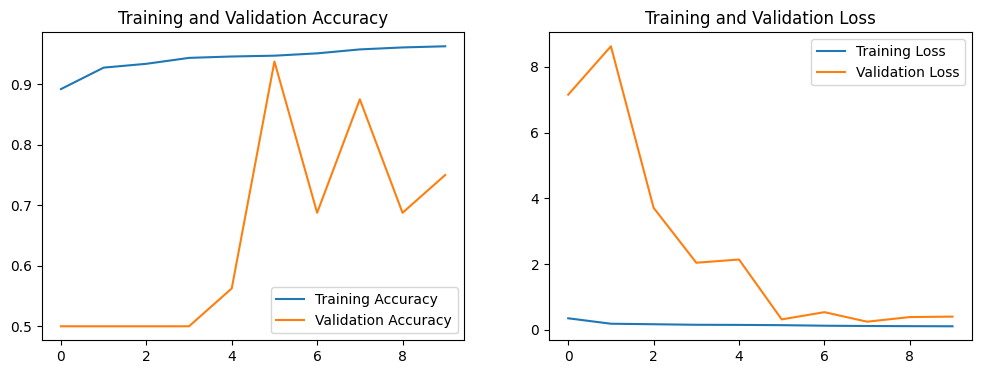

In [101]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))



plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Summary:

### Model Building and Training Key Findings

*   A simple CNN model was defined using Keras Sequential API with convolutional, pooling, flatten, and dense layers.
*   The model was compiled using the Adam optimizer and binary crossentropy loss, with accuracy as the evaluation metric.
*   The model was trained for 10 epochs using the prepared training and validation data generators.

### Insights or Next Steps

*   Evaluate the model's performance on the test set to assess its generalization ability.
*   Analyze the training and validation accuracy and loss plots to identify potential issues like overfitting or underfitting and consider strategies to address them (e.g., adding dropout, adjusting learning rate, increasing data augmentation).
*   Consider exploring more complex CNN architectures or transfer learning for potentially better performance.
*   Investigate the class imbalance in the dataset and consider techniques to handle it, as it might be affecting the model's performance, especially on the smaller validation set.